# Sklearn

## sklearn.linear_model

**linear_model:**
* RidgeClassifier
* SGDClassifier
* SGDRegressor
* LinearRegression
* LogisticRegression
* Lasso
* etc

документация: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

примеры: http://scikit-learn.org/stable/modules/linear_model.html#linear-model

In [1]:
from matplotlib.colors import ListedColormap
from sklearn import cross_validation, datasets, linear_model, metrics

import numpy as np

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/emily/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Генерация данных

In [7]:
blobs = datasets.make_blobs(centers = 2, cluster_std = 3.5, random_state=1)

In [ ]:
blobs[1]

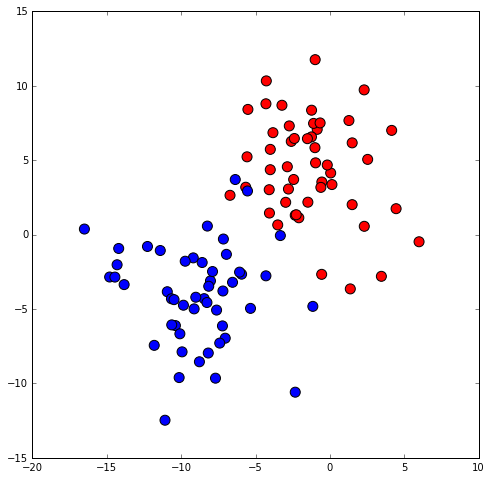

In [8]:
colors = ListedColormap(['red', 'blue'])

pylab.figure(figsize(8, 8))
pylab.scatter(map(lambda x: x[0], blobs[0]), map(lambda x: x[1], blobs[0]), c = blobs[1], cmap = colors,
             s=100)

In [ ]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(blobs[0], blobs[1], 
                                                                                    test_size = 0.3,
                                                                                    random_state = 1)

### Линейная классификация

#### RidgeClassifier

In [ ]:
#создание объекта - классификатора
ridge_classifier = linear_model.RidgeClassifier(random_state = 1)

In [ ]:
#обучение классификатора
ridge_classifier.fit(train_data, train_labels)

In [ ]:
#применение обученного классификатора
ridge_predictions = ridge_classifier.predict(test_data)

In [ ]:
print test_labels

In [ ]:
print ridge_predictions

In [ ]:
#оценка качества классификации
1. - metrics.accuracy_score(test_labels, ridge_predictions)

In [ ]:
ridge_classifier.coef_

In [ ]:
ridge_classifier.intercept_ 

#### LogisticRegression

In [ ]:
log_regressor = linear_model.LogisticRegression(random_state = 0)

In [ ]:
log_regressor.fit(train_data, train_labels)

In [ ]:
lr_predictions = log_regressor.predict(test_data)

In [ ]:
lr_proba_predictions = log_regressor.predict_proba(test_data)

In [ ]:
print test_labels

In [ ]:
print lr_predictions

In [ ]:
 0.70965944  + 0.29034056

In [ ]:
print lr_proba_predictions

In [ ]:
print metrics.roc_auc_score(test_labels, lr_predictions)

In [ ]:
print metrics.roc_auc_score(test_labels, lr_proba_predictions[:,1])

In [ ]:
print metrics.accuracy_score(test_labels, lr_predictions)

In [ ]:
print metrics.accuracy_score(test_labels, ridge_predictions)

### Оценка качества по cross-validation

#### cross_val_score

In [ ]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = 'accuracy', cv = 10)

In [ ]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = metrics.accuracy_score, cv = 10)

In [ ]:
ridge_scoring

In [ ]:
lr_scoring

In [ ]:
print 'Ridge mean:{}, max:{}, min:{}, std:{:2f}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

In [ ]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())

#### cross_val_score с заданными scorer и cv_strategy

In [ ]:
scorer = metrics.make_scorer(metrics.accuracy_score)

In [ ]:
cv_strategy = cross_validation.StratifiedShuffleSplit(blobs[1], n_iter = 20 , test_size = 0.3, random_state = 2)

In [ ]:
ridge_scoring = cross_validation.cross_val_score(ridge_classifier, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [ ]:
lr_scoring = cross_validation.cross_val_score(log_regressor, blobs[0], blobs[1], scoring = scorer, cv = cv_strategy)

In [ ]:
print 'Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring.mean(), ridge_scoring.max(), 
                                                     ridge_scoring.min(), ridge_scoring.std())

In [ ]:
print 'Log mean:{}, max:{}, min:{}, std:{}'.format(lr_scoring.mean(), lr_scoring.max(), 
                                                   lr_scoring.min(), lr_scoring.std())